<a href="https://colab.research.google.com/github/THABOR7677/Machine-Learning-Models/blob/main/Gold_price_prediction_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Dependencies and Libraries**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

# **Data Collection and Processing**

In [4]:
# Loading the csv data to a panda DataFrame
gold_data = pd.read_csv('/content/gld_price_data.csv')

In [5]:
#print the first five rows in the dataframe
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [6]:
# print the numder of rows and columns
gold_data.shape

(2290, 6)

In [7]:
# print the last 5 rows of the dataframe
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [8]:
# getting some basic information about the data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [9]:
#Checking the number of missing value in each columns
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [10]:
# getting the stastitical measures of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [12]:
# dropping the date column
gold_data = gold_data.drop(['Date'], axis=1)

# **Finding Correlation**

*   Positive Correlation
*   Negative Correlation



In [13]:
correlation = gold_data.corr()

<Axes: >

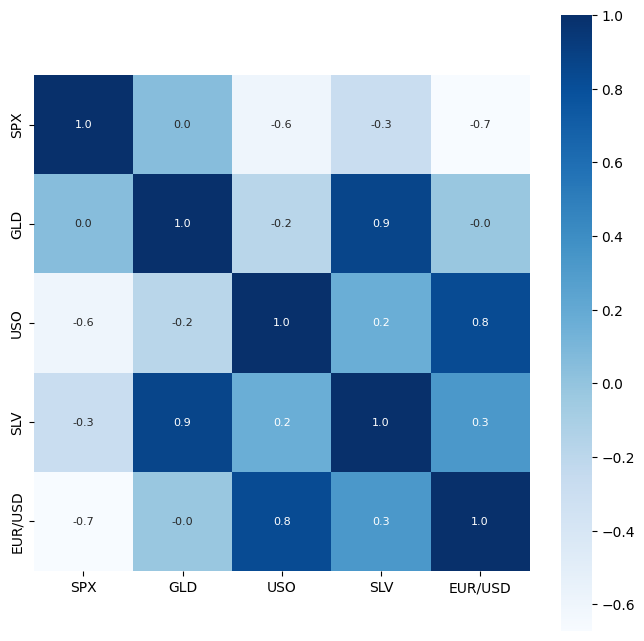

In [17]:
# constructing a heatmap to understand the correlation
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size': 8}, cmap='Blues')

In [18]:
# Correlation value of Gold
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


<ipython-input-19-2fa61ef592c3>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'], color='green')


<Axes: xlabel='GLD', ylabel='Density'>

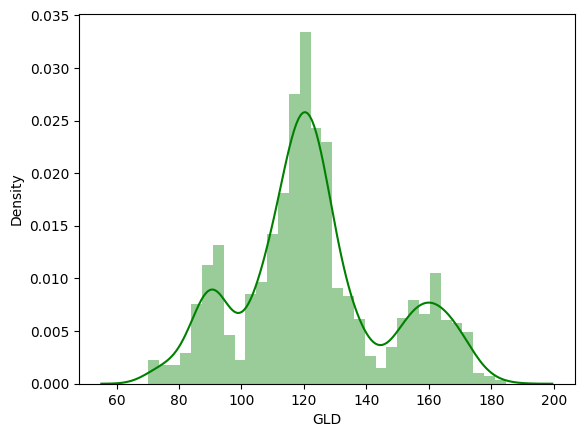

In [19]:
# Checking the distribution of the GLD price
sns.distplot(gold_data['GLD'], color='green')

# **Splitting the Features and Target**

In [21]:
x = gold_data.drop(['GLD'], axis=1)
y = gold_data['GLD']

In [22]:
print(x)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [23]:
print(y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


### **Splitting into Training data and Test Data**

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=2)

**Model Training: RandomForest Regressor**

In [25]:
regressor = RandomForestRegressor(n_estimators=100)


In [26]:
regressor.fit(x_train, y_train)

RandomForestRegressor()

**Model Evaluation**

In [27]:
# Prediction on Test Data
test_data_prediction = regressor.predict(x_test)


In [28]:
print(test_data_prediction)

[168.26039918  82.05349997 116.05930014 127.52880084 120.81040099
 154.86329753 150.20939857 126.23800035 117.46239874 125.93400077
 116.49380113 171.87740065 141.8438985  168.09589844 115.22169989
 117.50280052 139.56780274 169.9998005  159.4226034  161.08650032
 155.13179985 125.57110034 176.39869912 157.0723041  125.31110032
  93.96489994  77.26310016 120.52420013 119.22400007 167.46139983
  88.1567003  125.34899973  91.06830063 117.76190004 121.09719906
 136.00820072 115.44200153 115.44200081 148.06840026 106.9080011
 104.23050243  87.24119806 126.60450028 117.56869997 152.18469927
 119.59189983 108.39109991 108.26739839  93.09920084 126.88299804
  75.02950044 113.70699951 121.37490019 111.43559947 118.85999921
 120.59549956 159.88110009 166.91260161 146.85349685  85.96879876
  94.36040012  86.77389867  90.72440029 118.97040068 126.42850044
 127.52179993 169.4500999  122.29979957 117.25699903  98.5457003
 167.98650077 142.99739917 131.96350221 121.11970191 120.79829948
 120.0530003

In [29]:
# R squared error
error_score = metrics.r2_score(y_test, test_data_prediction)
print("R Squared error", error_score)

R Squared error 0.9889947065521801


Compare the Actual Values and Predicted Values in a Plot

In [30]:
y_test = list(y_test)

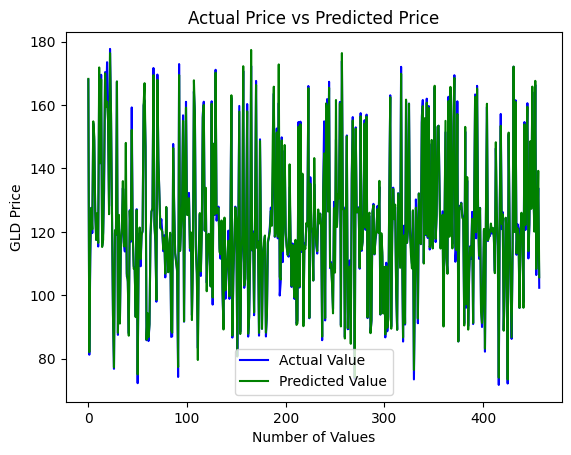

In [32]:
plt.plot(y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of Values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()